In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 2 - Options and Futures

## Problem 5

Suppose you enter into a **short** 6 month forward position at a forward price of 50. What is the payoff in 6 months for prices 40, 45, 50, 55, and 60?

When we are buyig a 6 month short forward position, we are buying the idea that underlying asset of the derivative is going to depreciate in value. Therefore that would mean that an appreciation in price above 50 would result in a loss, because again it is not depreciating in value. Have a look at this python code:

In [13]:
def forward_payoff():
    forward_price = 50
    prices = [40, 45, 50, 55, 60]

    payoffs = []
    for price in prices:
        payoffs.append(forward_price - price)

    return payoffs

print(f"Forward Price Payoffs: {forward_payoff()}")

Forward Price Payoffs: [10, 5, 0, -5, -10]


As we can see from the short 6-month forward, is that the payoff would be 10 when the price is 40 because it depreciated by 10 units. Also, when the price increases to 60, we then have a loss of -10, because of the appreciation to 60 units.

## Problem 7
Suppose XYZ stock pays no dividends and has a current price 50. The forward price for delivery in 1 year is 55. Suppose the 1-year effective annual interest is 10%

(a) Graph the payoff and profit diagrams for a forward contract on XYZ stock with a forward price of 55.

(b) Is there any advantage to investing in the stock or the forward contract? Why?

(c) Suppose XYZ paid a dividend of 2 per year and everything else stayed the same. Now is there any advantage to investing in the stock or the forward contract? Why?

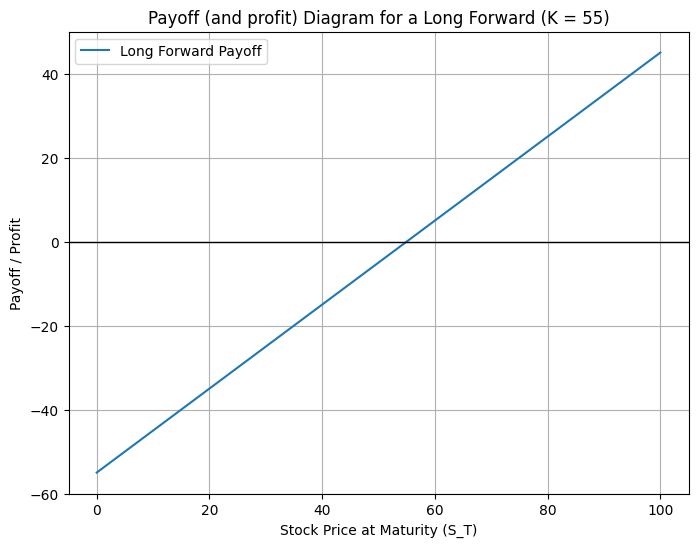

In [15]:
# (a) Graph the payoff and profit diagrams for a forward contract on XYZ stock with a forward price of 55.
# Define a range of possible stock prices at maturity
S = np.linspace(0, 100, 200) # Stock price goes from 0 to 100
K = 55 # Forward (delivery) price

# Payoff for a long forward position maturity:
# Payoff = S(T) - K
payoff_long = S - K

# For a forward contract with no initial cost,
# the profit is the same as the payoff (again ignoring financing):
profit_long = payoff_long

# Plot the payoff
plt.figure(figsize=(8, 6))
plt.plot(S, payoff_long, label="Long Forward Payoff")
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Stock Price at Maturity (S_T)')
plt.ylabel('Payoff / Profit')
plt.title('Payoff (and profit) Diagram for a Long Forward (K = 55)')
plt.legend()
plt.grid(True)
plt.show()

**(b) Is there any advantage to investing in the stock or the forward contract? Why?**

In a fair market with no dividends, no transaction costs, and a risk-free rate of 10%, there is no inherent advantage to either holding the stock or entering a forward contract at the fair forward price of 55. If you buy the stock now at 50 and hold it for a year, your outlay occurs immediately but you capture any price appreciation.

If instead you enter a forward contract at 55, you delay payment until maturity and lock in that price. However, the cost of financing (earning or paying the risk-free rate) essentially offsets any benefit you might gain from one approach versus the other, so - under these assumptions - neither strategy offers a clear arbitrage profit or cost advantage.

**(c) Suppose XYZ paid a dividend of 2 per year and everything else stayed the same. Now is there any advantage to investing in the stock or the forward contract? Why?**

Even with a 2 per year dividend, under idealized conditions (no transaction costs, taxes, or arbitrage opportunities), there is still no clear advantage to buying the stock versus entering into the forward contract, because the forward price should be lowered to reflect the present value of the dividends.

If you purchase the stock outright, you pay 50 now and receive dividends of 2 over year, while if you enter a forward contract, you delay payment until maturity but forgo the dividend. In a frictionless market, these two strategies are fairly prices to yield the same overall value once the dividend and financing effects are accounted for, so neither provides an arbitrage benefit over the other.

## Problem 13

Suppose the stock price is 40 and the effective annual interest rate is 8%.
* (a) Draw on a single graph payoff and profit diagrams for the following options (i) 35-strike call with a premium of 9.12, (ii) 40-strike call with a premium of 6.22, and (iii) 45-strike call with a premium of 4.08
* (b) Consider your payoff diagram with all three options graphed together. Intuitively, why should the option premium decrease with the strike price?

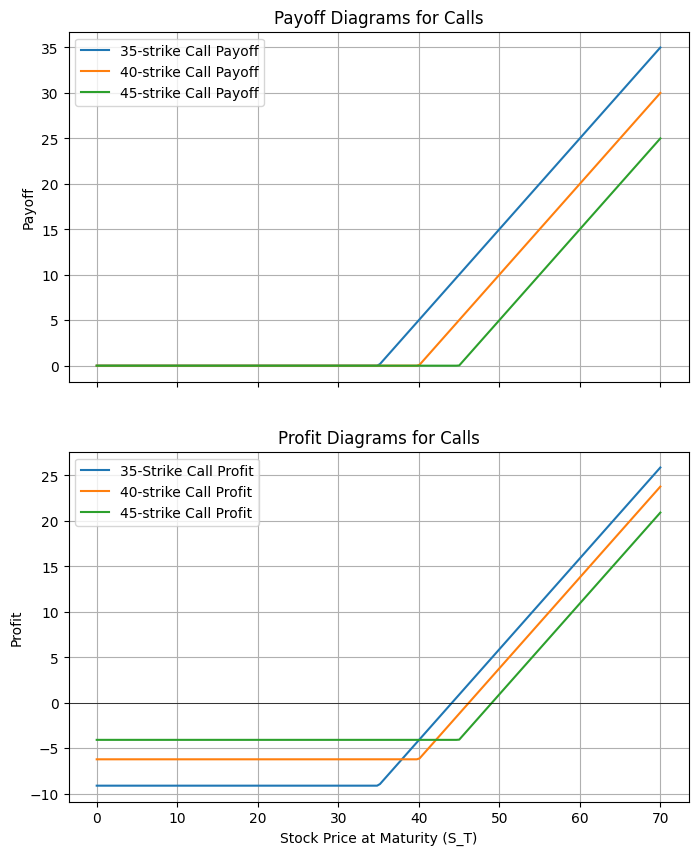

In [50]:
# data
stock_price = 40 # current stock price
r = 0.08 # Effective annual interest rate (8%), used only if you want to discount or grow premium

K1, premium1 = 35, 9.12
K2, premium2 = 40, 6.22
K3, premium3 = 45, 4.08

# Define a range of possible stock prices at maturity
S = np.linspace(0, 70, 200)

# Payoff for each call at maturity (S - K, 0)
payoff1 = np.maximum(S-K1, 0)
payoff2 = np.maximum(S-K2, 0)
payoff3 = np.maximum(S-K3, 0)

# Profit = Payoff - Premium (ignoring time value of money)
# If you want to incorporate the interest rate, you could do
profit1 = payoff1 - premium1
profit2 = payoff2 - premium2
profit3 = payoff3 - premium3

# Create subplots: top for payoff, bottom for profit
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), sharex=True)

# Payoff diagrams
axes[0].plot(S, payoff1, label='35-strike Call Payoff')
axes[0].plot(S, payoff2, label='40-strike Call Payoff')
axes[0].plot(S, payoff3, label='45-strike Call Payoff')
axes[0].set_ylabel('Payoff')
axes[0].set_title('Payoff Diagrams for Calls')
axes[0].grid(True)
axes[0].legend()

# Profit diagrams
axes[1].plot(S, profit1, label='35-Strike Call Profit')
axes[1].plot(S, profit2, label='40-strike Call Profit')
axes[1].plot(S, profit3, label='45-strike Call Profit')
axes[1].axhline(0, color='black', linewidth=0.5)  # Horizontal line at zero
axes[1].set_xlabel('Stock Price at Maturity (S_T)')
axes[1].set_ylabel('Profit')
axes[1].set_title('Profit Diagrams for Calls')
axes[1].grid(True)
axes[1].legend()
plt.show()

**(b) Consider your payoff diagram with all three options graphed together. Intuitively, why should the option premium decrease with the strike price?**

Because a lower strike price makes the call option more likely to up ITM (and thus have a higher payoff at maturity), it must cost more today. Conversely, the higher strike price, the smaller the chance that the option will finish in-the-money or ITM, reducing its expected payoff and thus lowering the premium. This explains why the 35-strike call has a higher premium than the 40-strike call, which in turn has a higher premium than the 45-strike call.

## Problem 14
Suppose the stock price is 40 and the effective annual interest rate is 8%. Draw payoff and profit diagrams for the following options:
(a) 35-strike put with a premium of 1.53, (b) 40-strike put with a premium of 3.26, (c) 45-strike put with a premium of 5.75.

Consider your payoff diagramn, with all three options graphed together. Intuitively, why should the option premium increase with the strike price?

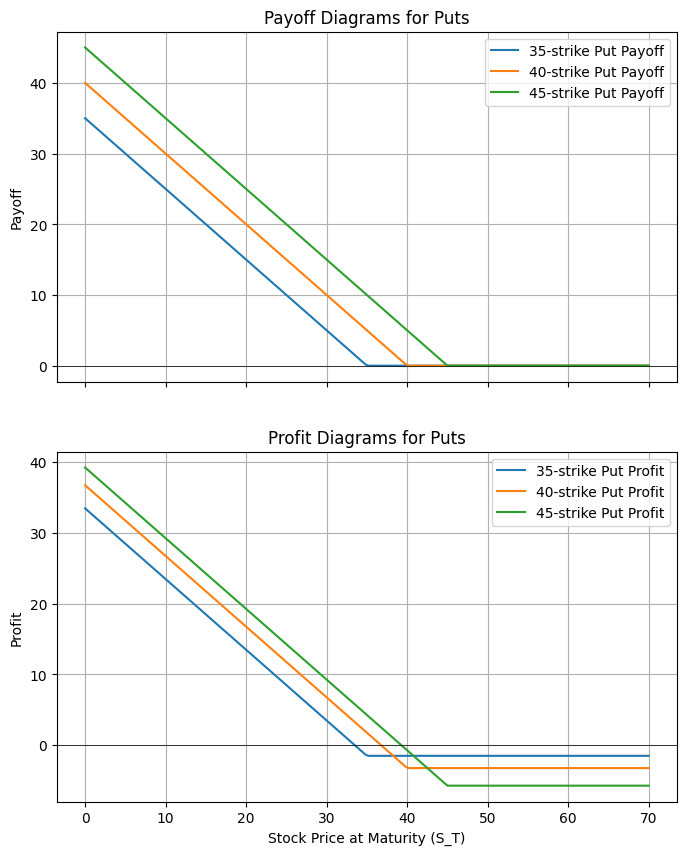

In [55]:
stock_price = 40
r = 0.08
K1, premium1 = 35, 1.53
K2, premium2 = 40, 3.26
K3, premium3 = 45, 5.75

S = np.linspace(0, 70, 200)

payoff1 = np.maximum(K1 - S, 0)
payoff2 = np.maximum(K2 - S, 0)
payoff3 = np.maximum(K3 - S, 0)

# Profit = Payoff - Premium (ignoring time value of money)
# If you wanted to incorporate interest, you could do: 
#   profit1 = payoff1 - premium1*(1+r)
profit1 = payoff1 - premium1
profit2 = payoff2 - premium2
profit3 = payoff3 - premium3

# Create subplots: top for payoff, bottom for profit
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), sharex=True)

# --- Payoff diagrams ---
axes[0].plot(S, payoff1, label='35-strike Put Payoff')
axes[0].plot(S, payoff2, label='40-strike Put Payoff')
axes[0].plot(S, payoff3, label='45-strike Put Payoff')
axes[0].axhline(0, color='black', linewidth=0.5)  # Horizontal line at zero
axes[0].set_ylabel('Payoff')
axes[0].set_title('Payoff Diagrams for Puts')
axes[0].grid(True)
axes[0].legend()

# --- Profit diagrams ---
axes[1].plot(S, profit1, label='35-strike Put Profit')
axes[1].plot(S, profit2, label='40-strike Put Profit')
axes[1].plot(S, profit3, label='45-strike Put Profit')
axes[1].axhline(0, color='black', linewidth=0.5)  # Horizontal line at zero
axes[1].set_xlabel('Stock Price at Maturity (S_T)')
axes[1].set_ylabel('Profit')
axes[1].set_title('Profit Diagrams for Puts')
axes[1].grid(True)
axes[1].legend()

plt.show()

Because a higher strike price makes the put option more valuable (it allows the holder to sell the underlying at a higher price if the market goes down), it is more likely to finish in the money, and if it does, it will generally provide a larger payoff. This increased potential payoff translates into a higher option premium. Consequently, the 45-strike put has a higher premium than the 40-strike put, which in turn has a higher premium than the 35-strike put.